In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix


Load the heart disease dataset 

In [2]:
df = pd.read_csv('heart_disease.csv')

Prepare the data: Separate features and target

In [3]:
X = df.drop('target', axis=1)
y = df['target']

Split the data into training and testing sets

In [4]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

Initialize models

In [10]:
models = {
    'Logistic Regression': LogisticRegression(max_iter=1000, random_state=42),
    'KNN': KNeighborsClassifier(),
    'SVM': SVC(random_state=42),
    'Gaussian Naive Bayes': GaussianNB(),
    'Decision Tree': DecisionTreeClassifier(random_state=42),
    'Random Forest': RandomForestClassifier(random_state=42)
}

Train and evaluate each model

In [11]:
accuracy_scores = {}
confusion_matrices = {}
for model_name, model in models.items():
    model.fit(X_train, y_train)
    y_pred = model.predict(X_test)
    accuracy_scores[model_name] = accuracy_score(y_test, y_pred)
    confusion_matrices[model_name] = confusion_matrix(y_test, y_pred)


Plot the accuracy scores using a bar plot

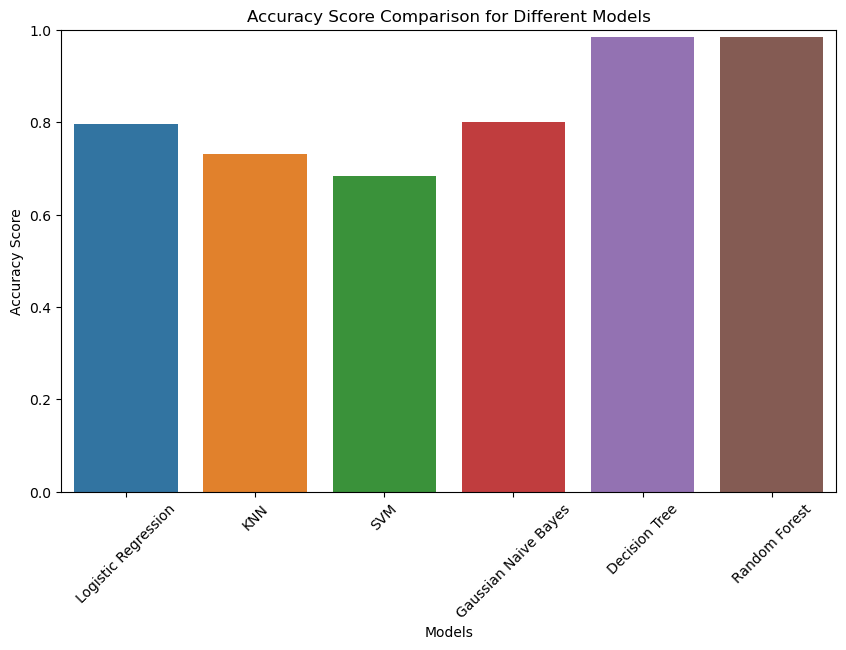

In [12]:
plt.figure(figsize=(10, 6))
sns.barplot(x=list(accuracy_scores.keys()), y=list(accuracy_scores.values()))
plt.xlabel('Models')
plt.ylabel('Accuracy Score')
plt.title('Accuracy Score Comparison for Different Models')
plt.ylim(0, 1.0)
plt.xticks(rotation=45)
plt.show()

Display confusion matrices

In [13]:
for model_name, matrix in confusion_matrices.items():
    print(f"\nConfusion Matrix for {model_name}:")
    print(matrix)


Confusion Matrix for Logistic Regression:
[[73 29]
 [13 90]]

Confusion Matrix for KNN:
[[74 28]
 [27 76]]

Confusion Matrix for SVM:
[[62 40]
 [25 78]]

Confusion Matrix for Gaussian Naive Bayes:
[[72 30]
 [11 92]]

Confusion Matrix for Decision Tree:
[[102   0]
 [  3 100]]

Confusion Matrix for Random Forest:
[[102   0]
 [  3 100]]
